In [1]:
# Hafizh Mulya H-18117030 & Karisa Ardelia Hanifah-18117022
# Update: 20 Agustus 2021
# Tugas Mata Kuliah ET3107 Pemrograman Lanjut
# Pengolahan data dengan Pandas
# Juga tersedia di https://colab.research.google.com/drive/1jqTZRtc96nsL_sCjNns6CUNq0LQQxxh5?usp=sharing

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Retrieve data
url = 'https://github.com/eueung/pilrek/raw/master/pilrek.csv'
df  = pd.read_csv(url)
df.columns = ['Timestamp', 'Kategori', 'Umur', 'CaRek', 'Alasan', 'Harapan']
df

,Timestamp,Kategori,Umur,CaRek,Alasan,Harapan
0,9/1/2019 7:47:18,Alumni,25 - 40 th,Jaka Sembiring (STEI),Sesuai dengan kriteria kekinian (Rektor 4.0),NaN
1,9/1/2019 8:33:56,Alumni,> 40 th,Suhono Harso Supangkat (STEI),Tipe yg futuristik dan outside-the-box yg bisa...,NaN
2,9/1/2019 8:59:43,Umum,25 - 40 th,Suhono Harso Supangkat (STEI),Sesuai dengan kriteria kekinian (Rektor 4.0),Menjadikan itb peningkat sumber daya manusia i...
3,9/1/2019 9:26:44,Pegawai / Tendik,> 40 th,Suhono Harso Supangkat (STEI),Sesuai dengan kriteria kekinian (Rektor 4.0),NaN
4,9/1/2019 12:25:40,Dosen,25 - 40 th,Kadarsah Suryadi (FTI-TI),Karakter kepemimpinan dan leadership,NaN
...,...,...,...,...,...,...
971,10/4/2019 15:38:56,Alumni,> 40 th,I Nyoman Pugeg Aryantha (SITH),"Emansipasi, kesetaraan dan kebhinekaan",Sesekali Rektor ITB orang Bali
972,10/7/2019 9:04:03,Mahasiswa,< 25 th,Edy Tri Baskoro (FMIPA-MA),Alumni SMPP Jombang,Dapat menjalankan amanah kepemimpinan ITB
973,10/8/2019 8:52:14,Dosen,25 - 40 th,Ary Setiaji Prihatmanto (STEI),Kapabilitas ybs utk meningkatkan ranking ITB,NaN
974,10/8/2019 11:45:04,Alumni,25 - 40 th,Ary Setiaji Prihatmanto (STEI),Akhlak dan budi pekerti,NaN


In [4]:
plot_1_filter = df[df.Kategori == 'Alumni']
plot_1_groupby = plot_1_filter.groupby('Alasan')
plot_1_count = plot_1_groupby.count().reset_index()[['Alasan', 'Timestamp']].sort_values('Timestamp', ascending = False)
plot_1_count

#For Kategori == Alumni, "Kapabilitas ybs utk memajukan riset dan industri RI" is the most frequent entry for "Alasan"
#For Kategori == Alumni, "Sesuai dengan kriteria kekinian (Rektor 4.0)" is the second most frequent entry for "Alasan"

,Alasan,Timestamp
7,Kapabilitas ybs utk memajukan riset dan indust...,59
16,Sesuai dengan kriteria kekinian (Rektor 4.0),53
12,Kecerdasan dan keberanian utk kemajuan ITB,40
10,Keberhasilan dan prestasi,38
17,Tipe yg futuristik dan outside-the-box yg bisa...,32
8,Kapabilitas ybs utk meningkatkan ranking ITB,24
9,Karakter kepemimpinan dan leadership,22
14,Muda dan berenergi,22
0,Akhlak dan budi pekerti,20
13,Mendatangkan dana riset dan kerjasama eksterna...,15


In [5]:
new_row = pd.DataFrame({
    'Alasan' : ['Lainnya'],
    'Timestamp' : [plot_1_count['Timestamp'][11:].sum()]
})

plot_1_count = pd.concat([plot_1_count[:11],new_row]).reset_index(drop=True)
plot_1_count.set_index('Alasan', inplace=True)
plot_1_count
#some datas are aggregated as 'lainnya'

,Timestamp
Alasan,
Kapabilitas ybs utk memajukan riset dan industri RI,59
Sesuai dengan kriteria kekinian (Rektor 4.0),53
Kecerdasan dan keberanian utk kemajuan ITB,40
Keberhasilan dan prestasi,38
Tipe yg futuristik dan outside-the-box yg bisa menangkap peluang masa depan,32
Kapabilitas ybs utk meningkatkan ranking ITB,24
Karakter kepemimpinan dan leadership,22
Muda dan berenergi,22
Akhlak dan budi pekerti,20


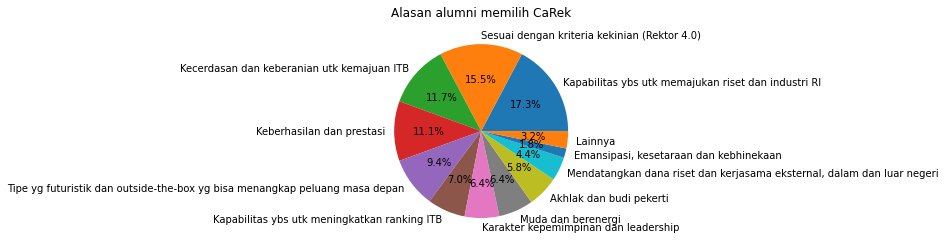

In [6]:
plot_1 = plot_1_count.plot(y='Timestamp', kind='pie',autopct='%1.1f%%', legend=None)
plot_1.set_ylabel('')
plot_1.set_title('Alasan alumni memilih CaRek')
plot_1

In [7]:
#As Telecommunication Engineering Students, we have concern about how Industry 4.0 affects the PilRek
plot_2_filter = df[df.Alasan == 'Sesuai dengan kriteria kekinian (Rektor 4.0)']
plot_2_groupby = plot_2_filter.groupby('CaRek')
plot_2_count = plot_2_groupby.count().sort_values('Timestamp', ascending = False)[['Timestamp']]
plot_2_count

,Timestamp
CaRek,
Acep Purqon (FMIPA-FI),75
Edy Tri Baskoro (FMIPA-MA),22
Suhono Harso Supangkat (STEI),16
I Nyoman Pugeg Aryantha (SITH),9
Ary Setiaji Prihatmanto (STEI),8
Dwi Larso (SBM / President Univ),7
Emir Mauludi Husni (STEI),7
Sigit Puji Santosa (FTMD),5
Benyamin Sapiie (FITB),4


Text(0.5, 1.0, 'Carek memiliki kriteria kekinian (Rektor 4.0)')

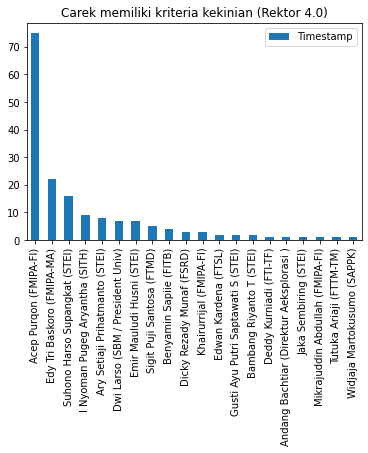

In [8]:
plot_2 = plot_2_count.plot(kind='bar')
plot_2.set_xlabel('')
plot_2.set_title('Carek memiliki kriteria kekinian (Rektor 4.0)')

In [9]:
plot_3_filter = df[df.Alasan == 'Sesuai dengan kriteria kekinian (Rektor 4.0)']
plot_3_groupby = plot_3_filter.groupby('Kategori')
plot_3_count = plot_3_groupby.count().sort_values('Timestamp', ascending = False)[['Timestamp']]
plot_3_count

#

,Timestamp
Kategori,
Umum,61
Alumni,53
Mahasiswa,24
Dosen,22
Pegawai / Tendik,11


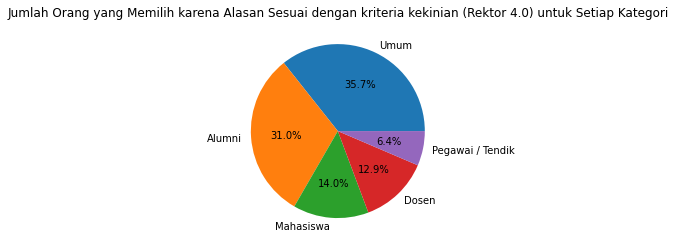

In [10]:
plot_3 = plot_3_count.plot(y='Timestamp', kind='pie',autopct='%1.1f%%', legend=None)
plot_3.set_ylabel('')
plot_3.set_title('Jumlah Orang yang Memilih karena Alasan Sesuai dengan kriteria kekinian (Rektor 4.0) untuk Setiap Kategori' )
plot_3

In [11]:
plot_4_filter = df[df.Kategori == 'Mahasiswa']
plot_4_groupby = plot_4_filter.groupby('Alasan')
plot_4_count = plot_4_groupby.count().sort_values('Timestamp', ascending = False)[['Timestamp']]
plot_4_count

,Timestamp
Alasan,
Sesuai dengan kriteria kekinian (Rektor 4.0),24
Keberhasilan dan prestasi,21
Tipe yg futuristik dan outside-the-box yg bisa menangkap peluang masa depan,20
Kapabilitas ybs utk memajukan riset dan industri RI,19
Muda dan berenergi,17
Akhlak dan budi pekerti,14
Karakter kepemimpinan dan leadership,14
Kecerdasan dan keberanian utk kemajuan ITB,14
"Mendatangkan dana riset dan kerjasama eksternal, dalam dan luar negeri",11


Text(0.5, 1.0, 'Alasan Mahasiswa dalam Memilih CaRek')

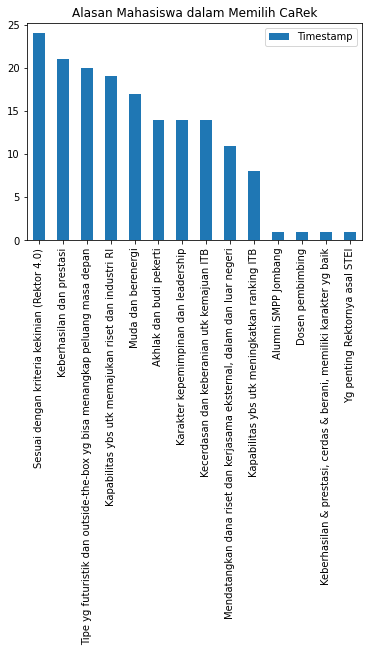

In [12]:
plot_4 = plot_4_count.plot(kind='bar')
plot_4.set_xlabel('')
plot_4.set_title('Alasan Mahasiswa dalam Memilih CaRek')

In [13]:
plot_5_filter = df[df.Alasan == 'Kapabilitas ybs utk memajukan riset dan industri RI']
plot_5_groupby = plot_5_filter.groupby('CaRek')
plot_5_count = plot_5_groupby.count().sort_values('Timestamp', ascending = False)[['Timestamp']]
plot_5_count

,Timestamp
CaRek,
I Nyoman Pugeg Aryantha (SITH),30
Edy Tri Baskoro (FMIPA-MA),20
Acep Purqon (FMIPA-FI),16
Emir Mauludi Husni (STEI),9
Sigit Puji Santosa (FTMD),7
Khairurrijal (FMIPA-FI),5
Benyamin Sapiie (FITB),4
Dicky Rezady Munaf (FSRD),4
Bambang Riyanto T (STEI),4


Text(0.5, 1.0, 'Carek memiliki Kapabilitas untuk memajukan riset dan industri RI')

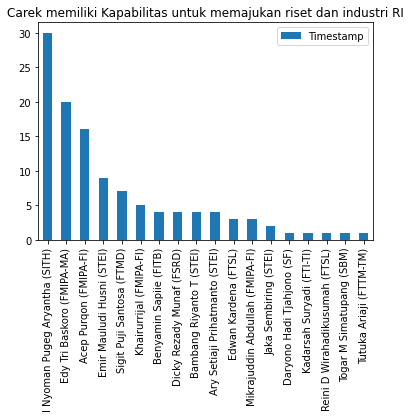

In [14]:
plot_5 = plot_5_count.plot(kind='bar')
plot_5.set_xlabel('')
plot_5.set_title('Carek memiliki Kapabilitas untuk memajukan riset dan industri RI')